In [20]:
import torch
import torch.nn as nn
from torch.autograd import  Variable
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_values = [i for i in range(11)]
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [5]:
x_train = np.array(x_values, dtype=np.float32)
x_train

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
      dtype=float32)

In [6]:
x_train = x_train.reshape(-1,1)

In [8]:
y_values = [2* i + 1 for i in x_values]
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [9]:
y_train = np.array(y_values, dtype=np.float32)
y_train

array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.],
      dtype=float32)

In [10]:
y_train = y_train.reshape(-1,1)

In [12]:
#create a class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel,self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self,x):
        out = self.linear(x)
        return out

In [13]:
input_size = 1
output_size = 1
model = LinearRegressionModel(input_size, output_size)

In [14]:
criterion = nn.MSELoss()

In [15]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [16]:
epochs = 100

In [17]:
for epoch in range(epochs):
    epoch += 1
    #convert numpy to torch variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    #clear gradients wrt parameters
    optimizer.zero_grad()
    
    #forward to get output
    outputs = model(inputs)
    
    #calculate loss
    loss = criterion(outputs, labels)
    
    #Getting gradients wrt parameters
    loss.backward()
    
    #update parameters
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss.data[0]))

epoch 1, loss 70.01628875732422
epoch 2, loss 5.837345123291016
epoch 3, loss 0.6010619401931763
epoch 4, loss 0.17256027460098267
epoch 5, loss 0.136229008436203
epoch 6, loss 0.13190150260925293
epoch 7, loss 0.13019971549510956
epoch 8, loss 0.12872719764709473
epoch 9, loss 0.1272881031036377
epoch 10, loss 0.1258666217327118
epoch 11, loss 0.12446106225252151
epoch 12, loss 0.12307124584913254
epoch 13, loss 0.12169691175222397
epoch 14, loss 0.12033804506063461
epoch 15, loss 0.11899421364068985
epoch 16, loss 0.1176653727889061
epoch 17, loss 0.11635147780179977
epoch 18, loss 0.11505218595266342
epoch 19, loss 0.11376743763685226
epoch 20, loss 0.11249703913927078
epoch 21, loss 0.11124074459075928
epoch 22, loss 0.10999845713376999
epoch 23, loss 0.1087702289223671
epoch 24, loss 0.1075555756688118
epoch 25, loss 0.1063544899225235
epoch 26, loss 0.1051669642329216
epoch 27, loss 0.10399259626865387
epoch 28, loss 0.1028311550617218
epoch 29, loss 0.1016828715801239
epoch 30, 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:22: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


In [18]:
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[ 0.6018456],
       [ 2.6591835],
       [ 4.7165213],
       [ 6.773859 ],
       [ 8.831197 ],
       [10.888535 ],
       [12.945872 ],
       [15.00321  ],
       [17.060547 ],
       [19.117886 ],
       [21.175222 ]], dtype=float32)

In [19]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

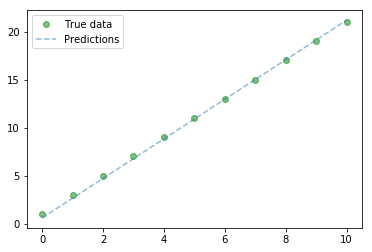

In [22]:
#clear figure

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [23]:
save_model = False
if save_model is True:
    torch.save(model.state_dict(), 'awesome_model.pkl')

In [24]:
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('awesome_model.pkl'))